In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
train_df['Basic_Demos-Age'].unique()

array([ 5,  9, 10, 18, 13, 15, 19, 11, 12,  7,  6, 14, 16,  8, 21, 17, 20,
       22])

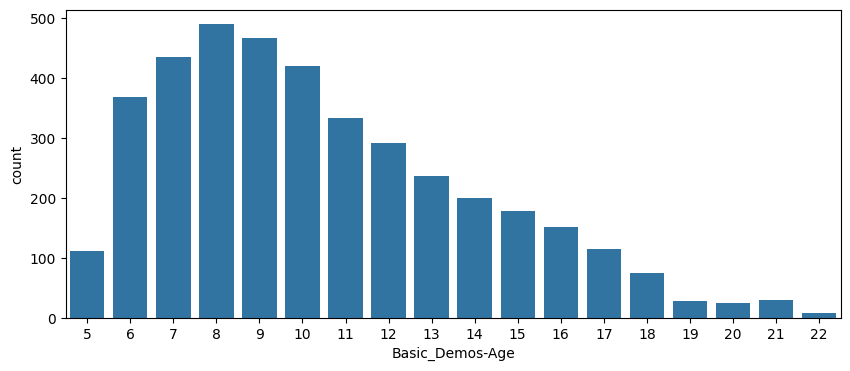

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='Basic_Demos-Age')
plt.show()


In [34]:
train_sii_df = train_df[train_df['sii'].notnull()]
train_df.shape, train_sii_df.shape

((3960, 82), (2736, 82))

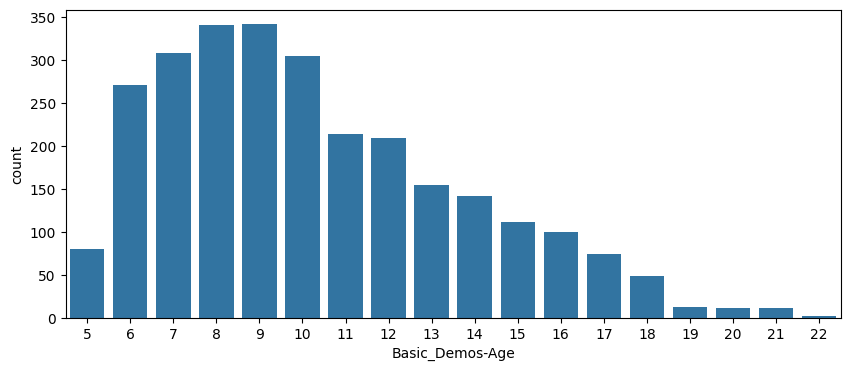

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_sii_df, x='Basic_Demos-Age')
plt.show()

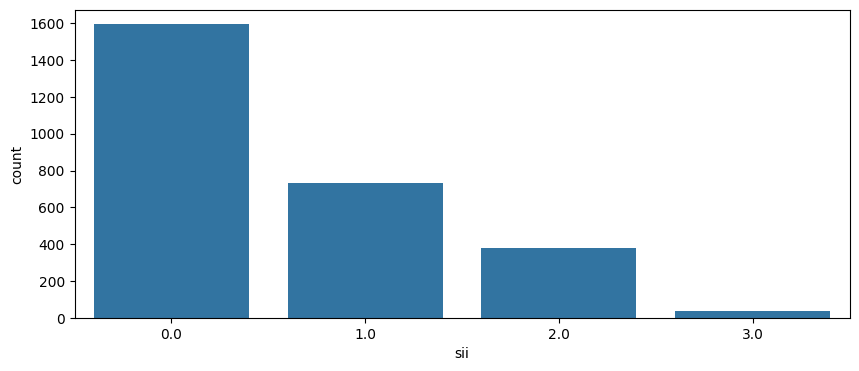

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(data=train_sii_df, x='sii')
plt.show()

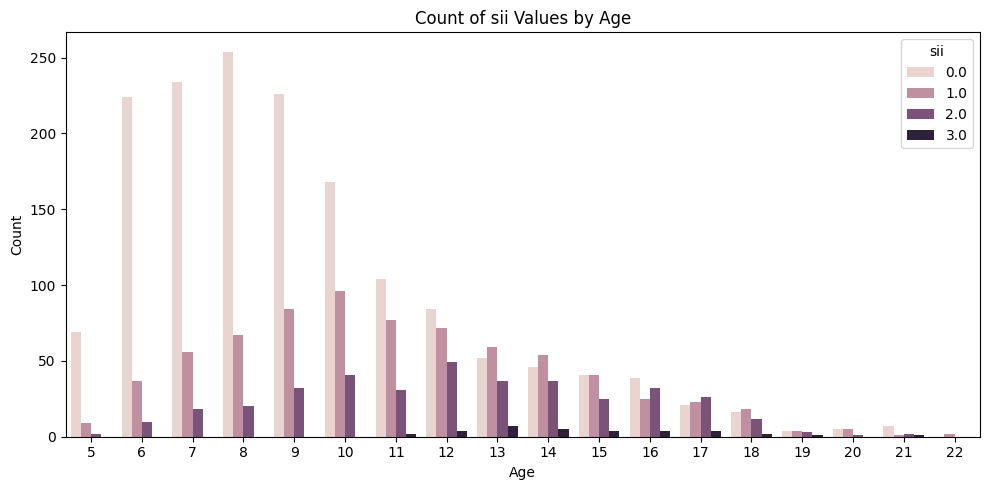

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Basic_Demos-Age', hue='sii', data=train_sii_df)
plt.title('Count of sii Values by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

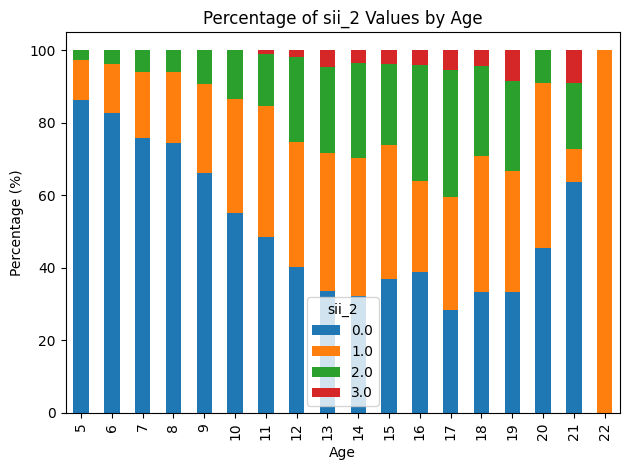

In [38]:
age_sii_counts = train_sii_df.groupby(['Basic_Demos-Age', 'sii']).size().unstack(fill_value=0)
age_sii_pct = age_sii_counts.div(age_sii_counts.sum(axis=1), axis=0) * 100

# Percentage plot
plt.figure(figsize=(10, 5))
age_sii_pct.plot(kind='bar', stacked=True)
plt.title('Percentage of sii_2 Values by Age')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.legend(title='sii_2')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_255304\909166812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sii_df['sii_2'] = train_sii_df['sii'].apply(lambda x: 0 if x == 0 else 1)


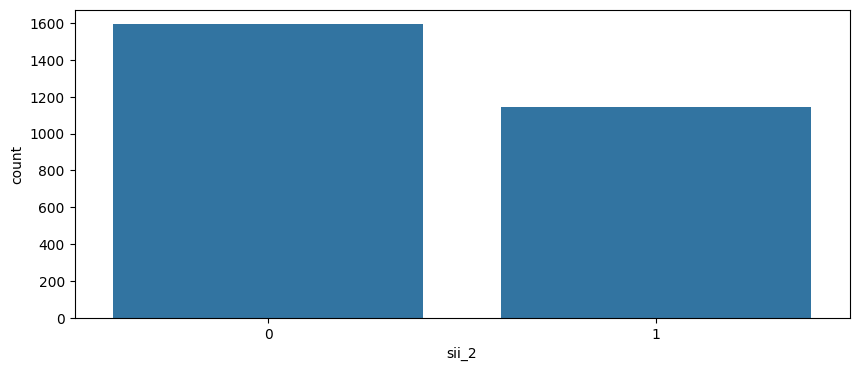

In [39]:
train_sii_df['sii_2'] = train_sii_df['sii'].apply(lambda x: 0 if x == 0 else 1)
plt.figure(figsize=(10,4))
sns.countplot(data=train_sii_df, x='sii_2')
plt.show()

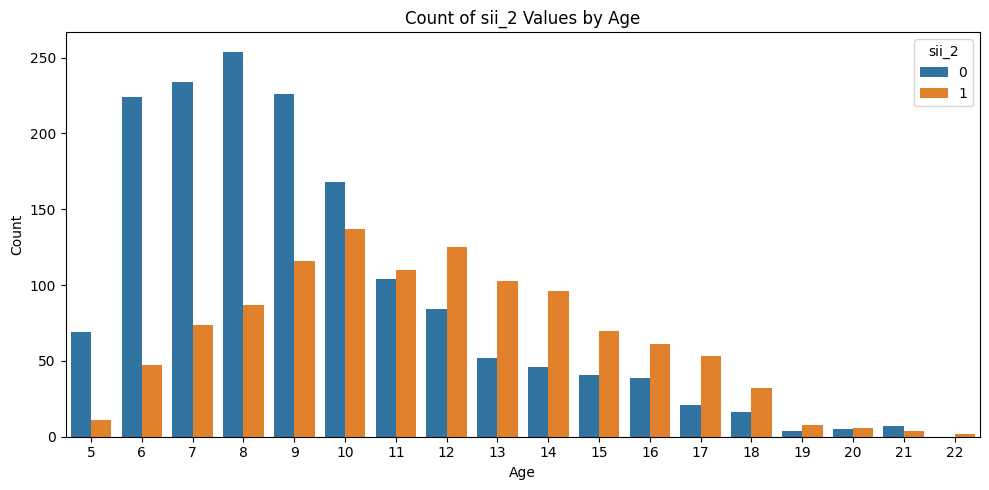

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Basic_Demos-Age', hue='sii_2', data=train_sii_df)
plt.title('Count of sii_2 Values by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

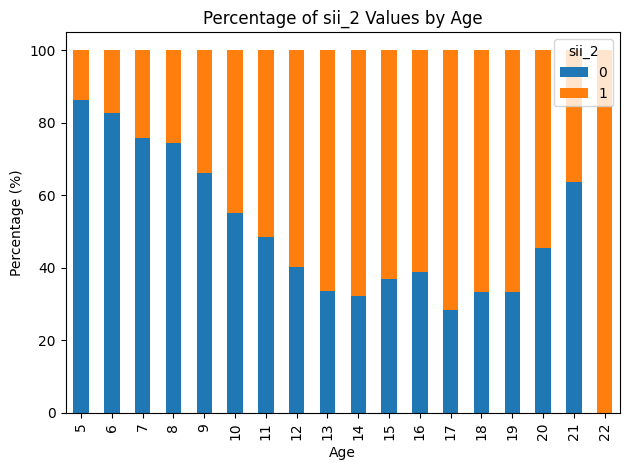

In [41]:
age_sii_counts = train_sii_df.groupby(['Basic_Demos-Age', 'sii_2']).size().unstack(fill_value=0)
age_sii_pct = age_sii_counts.div(age_sii_counts.sum(axis=1), axis=0) * 100

# Percentage plot
plt.figure(figsize=(10, 5))
age_sii_pct.plot(kind='bar', stacked=True)
plt.title('Percentage of sii_2 Values by Age')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.legend(title='sii_2')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

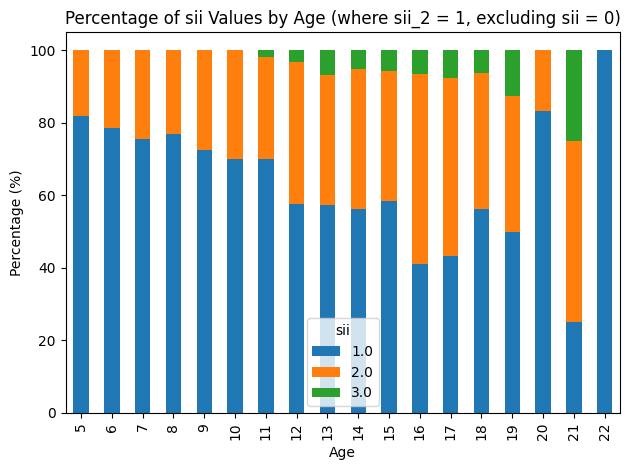

In [42]:
# Filter data where sii_2 = 1 and sii != 0
filtered_df = train_sii_df[(train_sii_df['sii_2'] == 1) & (train_sii_df['sii'] != 0)]

# Calculate percentage by age
sii_counts = filtered_df.groupby(['Basic_Demos-Age', 'sii']).size().unstack(fill_value=0)
sii_pct = sii_counts.div(sii_counts.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(10, 5))
sii_pct.plot(kind='bar', stacked=True)
plt.title('Percentage of sii Values by Age (where sii_2 = 1, excluding sii = 0)')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.legend(title='sii')
plt.tight_layout()
plt.show()

In [43]:
train_sii_df[train_sii_df['Basic_Demos-Age'] == 22]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,sii_2
1298,50a90725,Fall,22,1,NaN,NaN,Winter,34.509396,65.0,207.4,...,1.0,3.0,44.0,Winter,50.0,69.0,Fall,2.0,1.0,1
3297,d50a8c3c,Spring,22,1,NaN,NaN,Summer,40.898793,65.0,245.8,...,1.0,0.0,31.0,Summer,49.0,68.0,Spring,NaN,1.0,1


In [44]:
def get_age_group(x) :
  if x <= 10 : return 1
  elif x <= 14 : return 2
  elif x <= 19 : return 3
  elif x <= 22 : return 4

train_sii_df['age_group'] = train_sii_df['Basic_Demos-Age'].apply(get_age_group)

C:\Users\User\AppData\Local\Temp\ipykernel_255304\4077117978.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sii_df['age_group'] = train_sii_df['Basic_Demos-Age'].apply(get_age_group)


<Figure size 1000x500 with 0 Axes>

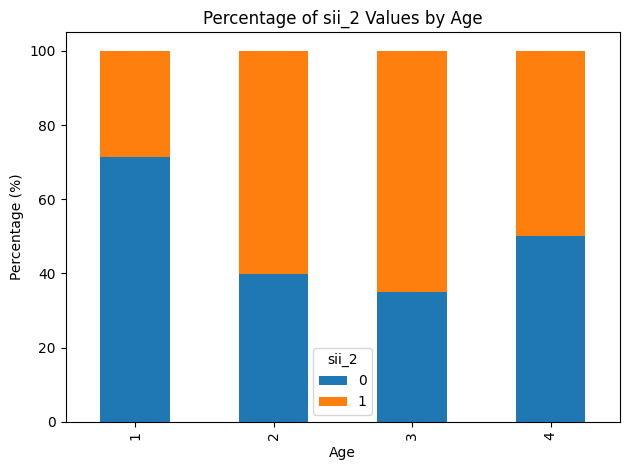

In [45]:
age_sii_counts = train_sii_df.groupby(['age_group', 'sii_2']).size().unstack(fill_value=0)
age_sii_pct = age_sii_counts.div(age_sii_counts.sum(axis=1), axis=0) * 100

# Percentage plot
plt.figure(figsize=(10, 5))
age_sii_pct.plot(kind='bar', stacked=True)
plt.title('Percentage of sii_2 Values by Age')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.legend(title='sii_2')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

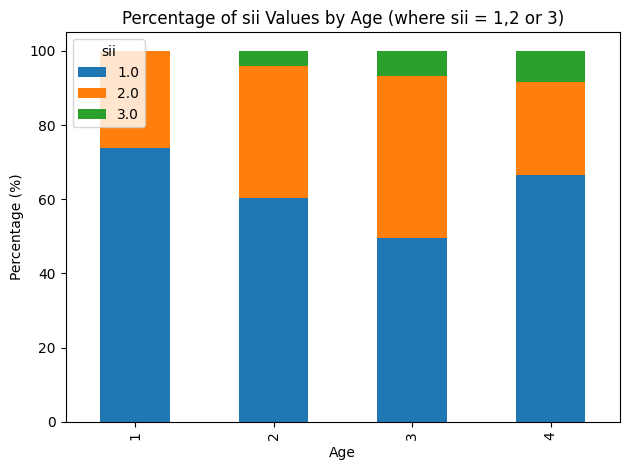

In [46]:
# Filter data where sii_2 = 1 and sii != 0
filtered_df = train_sii_df[(train_sii_df['sii_2'] == 1) & (train_sii_df['sii'] != 0)]

# Calculate percentage by age
sii_counts = filtered_df.groupby(['age_group', 'sii']).size().unstack(fill_value=0)
sii_pct = sii_counts.div(sii_counts.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(10, 5))
sii_pct.plot(kind='bar', stacked=True)
plt.title('Percentage of sii Values by Age (where sii = 1,2 or 3)')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.legend(title='sii')
plt.tight_layout()
plt.show()

## Merging Watch Data

In [47]:
avg_df = pd.read_csv('data/avg_parquet.csv')
avg_df = avg_df.drop(avg_df.columns[0], axis=1)
avg_df.head()

,enmo_h0,enmo_h1,enmo_h10,enmo_h11,enmo_h12,enmo_h13,enmo_h14,enmo_h15,enmo_h16,enmo_h17,...,light_h7,light_h8,light_h9,light_w1,light_w2,light_w3,light_w4,light_w5,light_w6,light_w7
0,0.020952,0.033222,0.046533,0.043808,0.030952,0.065813,0.045689,0.031533,0.058526,0.053016,...,26.282324,17.601913,13.703326,15.487296,79.802590,30.175367,25.983143,33.926468,11.132876,87.537865
1,0.002808,0.008027,0.021365,0.023271,0.038819,0.019645,0.030716,0.026229,0.018902,0.023248,...,10.422992,25.086334,57.522930,9.958206,46.146200,14.388186,49.012680,39.446934,20.296366,5.850941
2,0.004010,0.003738,0.049295,0.039044,0.149919,0.073839,0.054163,0.074922,0.045967,0.030919,...,26.846174,76.894750,108.581990,40.313942,45.987415,50.706913,41.632717,40.377525,228.700360,17.050716
3,0.004876,0.004869,0.065006,0.047939,0.047176,0.059867,0.052670,0.047561,0.064359,0.050110,...,11.770081,17.703312,25.183878,22.056694,21.379330,15.844161,17.851442,12.499741,12.259155,26.816135
4,0.005384,0.004706,0.061734,0.050658,0.112435,0.126275,0.078224,0.228003,0.173780,0.066350,...,10.299354,25.684927,34.599117,14.140425,48.232033,5.000000,74.605260,114.416660,77.441864,21.184536


In [48]:
avg_df.columns

Index(['enmo_h0', 'enmo_h1', 'enmo_h10', 'enmo_h11', 'enmo_h12', 'enmo_h13',
       'enmo_h14', 'enmo_h15', 'enmo_h16', 'enmo_h17', 'enmo_h18', 'enmo_h19',
       'enmo_h2', 'enmo_h20', 'enmo_h21', 'enmo_h22', 'enmo_h23', 'enmo_h3',
       'enmo_h4', 'enmo_h5', 'enmo_h6', 'enmo_h7', 'enmo_h8', 'enmo_h9',
       'enmo_w1', 'enmo_w2', 'enmo_w3', 'enmo_w4', 'enmo_w5', 'enmo_w6',
       'enmo_w7', 'id', 'light_h0', 'light_h1', 'light_h10', 'light_h11',
       'light_h12', 'light_h13', 'light_h14', 'light_h15', 'light_h16',
       'light_h17', 'light_h18', 'light_h19', 'light_h2', 'light_h20',
       'light_h21', 'light_h22', 'light_h23', 'light_h3', 'light_h4',
       'light_h5', 'light_h6', 'light_h7', 'light_h8', 'light_h9', 'light_w1',
       'light_w2', 'light_w3', 'light_w4', 'light_w5', 'light_w6', 'light_w7'],
      dtype='object')

In [49]:
merged_df = pd.merge(train_sii_df, avg_df, on='id', how='left')
merged_df.shape

(2736, 146)

In [50]:
def plot_age(columns, facet: str, row, col, row_size = 4, col_size=16) :

  fig, axes = plt.subplots(row, col, figsize=(col_size, row_size*row), sharex=True, sharey=True)
  facet_values = sorted(merged_df[facet].unique().tolist())
  axes = axes.flatten()

  for i, val in enumerate(facet_values):
      age_data = merged_df[merged_df[facet] == val]
      means = [age_data[col].mean() for col in columns]

      # Plot for this age group
      ax = axes[i]
      ax.plot(range(1, 8), means, marker='o', linewidth=2)
      ax.set_title(f'{facet} {val}')
      ax.set_xlabel('Weekday')
      ax.set_ylabel('Mean ENMO')
      # ax.set_xticks(range(1, 8))
      ax.grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()
  
def plot_single(columns, facet:str) :
  facet_values = sorted(merged_df[facet].unique().tolist())

  plt.figure(figsize=(10, 6))

  for i, age in enumerate(facet_values):
     age_data = merged_df[merged_df[facet] == age]
     means = [age_data[col].mean() for col in columns]

     plt.plot(range(1, 8), means, marker='o', linewidth=2, label=f'Age Group {age}')

  plt.title('Mean ENMO by Weekday Across Age Groups')
  plt.xlabel('Weekday')
  plt.ylabel('Mean ENMO')
  plt.xticks(range(1, 8))
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.tight_layout()
  plt.show()

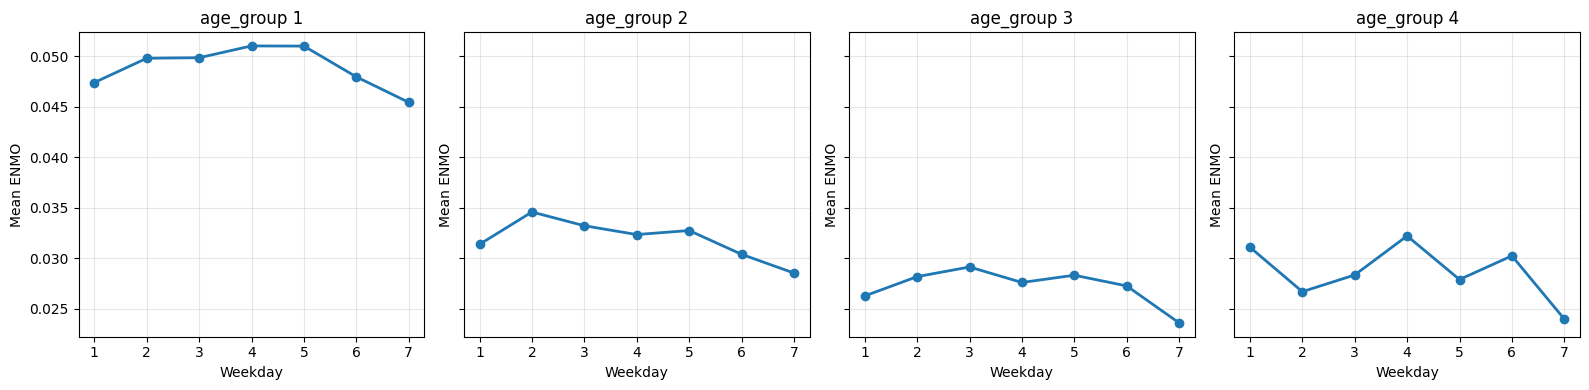

In [51]:
enmo_cols = ['enmo_w1', 'enmo_w2', 'enmo_w3', 'enmo_w4', 'enmo_w5', 'enmo_w6', 'enmo_w7']
plot_age(columns=enmo_cols, facet='age_group', row=1, col=4)

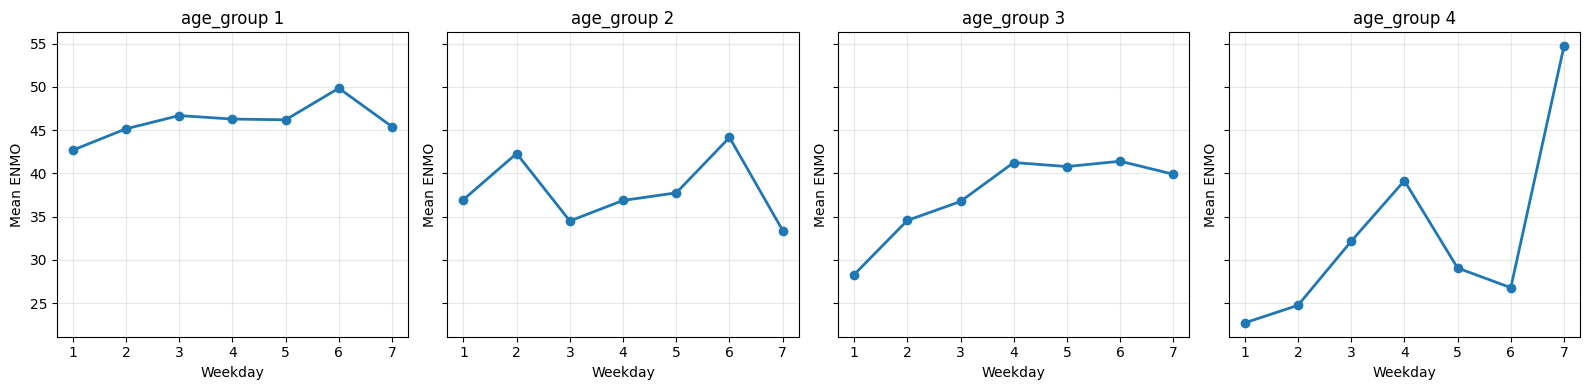

In [52]:
light_cols = ['light_w1','light_w2', 'light_w3', 'light_w4', 'light_w5', 'light_w6', 'light_w7']
plot_age(columns=light_cols, facet='age_group', row=1, col=4)

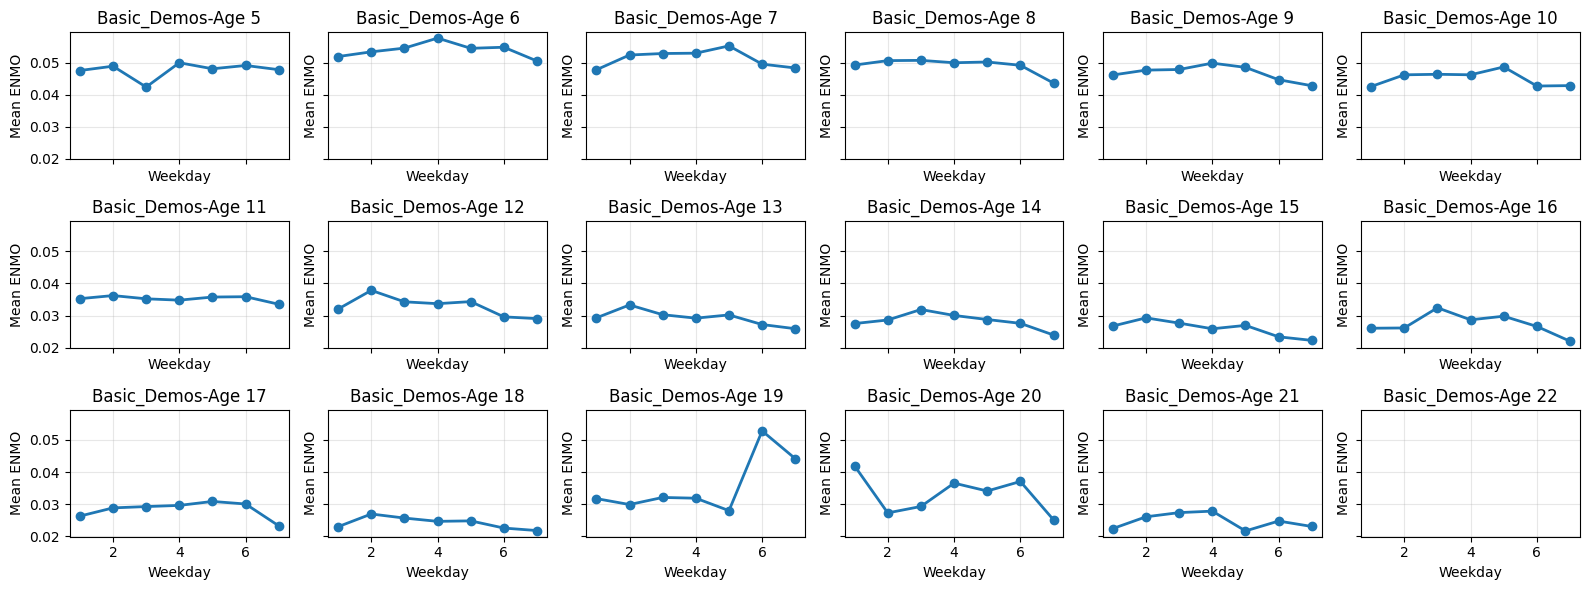

In [53]:
plot_age(columns=enmo_cols, facet='Basic_Demos-Age', row=3, col=6, row_size=2)

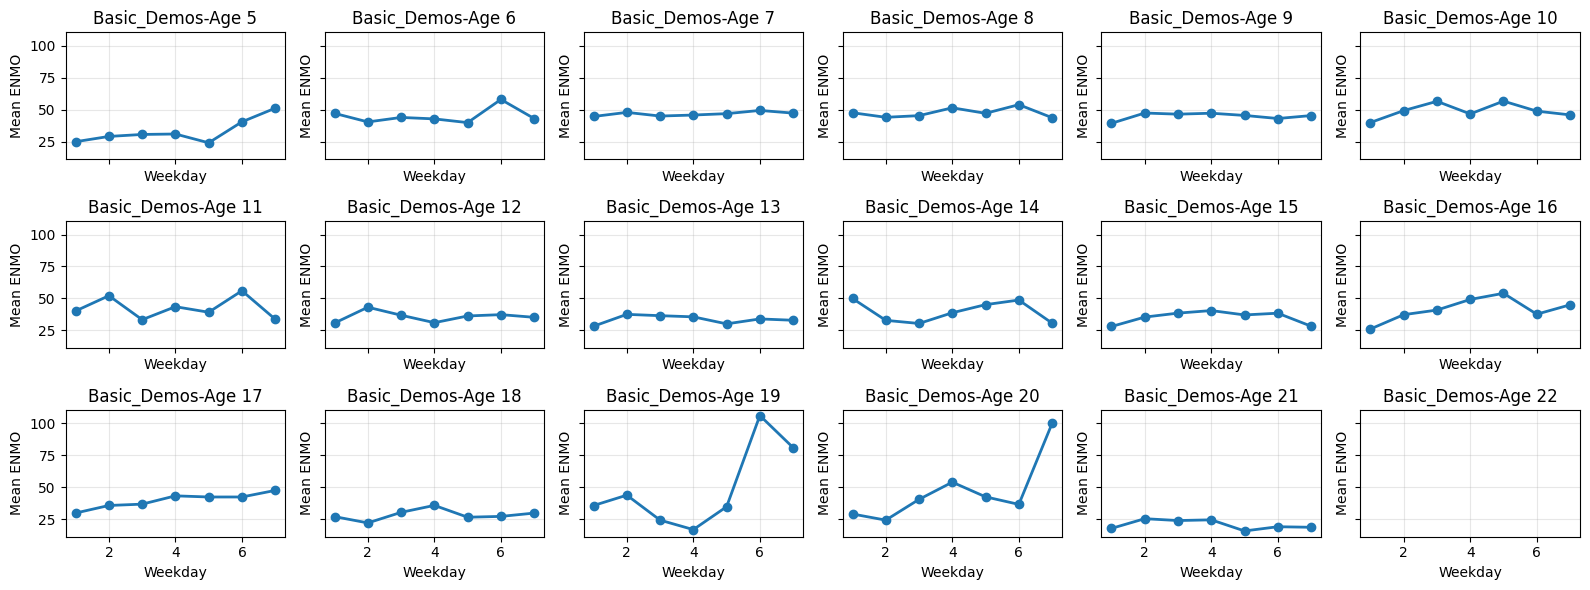

In [54]:
plot_age(columns=light_cols, facet='Basic_Demos-Age', row=3, col=6, row_size=2)

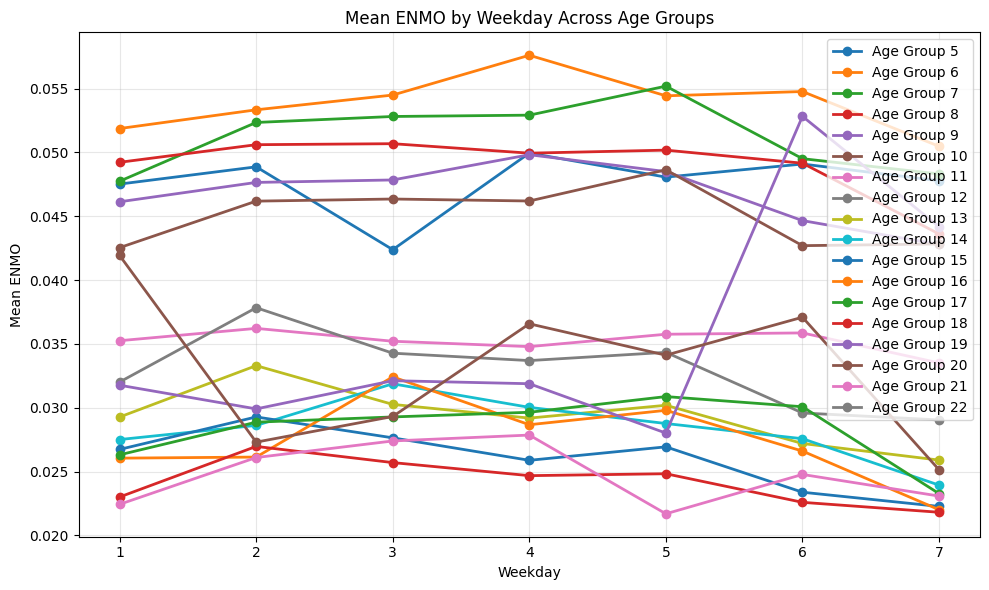

In [55]:
plot_single(columns=enmo_cols, facet='Basic_Demos-Age')

In [56]:
merged_nonna_df = merged_df.dropna(subset=['enmo_w1'])
merged_df.shape, merged_nonna_df.shape

((2736, 146), (977, 146))

In [57]:
merged_nonna_df.to_csv('data/merged_with_age_group.csv', index=False)